In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
train.shape,test.shape

((42000, 785), (28000, 784))

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = train.copy()
train_label = train_data["label"]
train_data.drop(labels="label",axis=1,inplace=True)
train_data.shape , len(train_label)

((42000, 784), 42000)

the dataset has 784 attributes as the image is of 28X28 pixels and each feature just represents the pixel intensity which can be ranging from 0(white) to 255(black)<br>
__Let's take a look at one digit from the dataset__

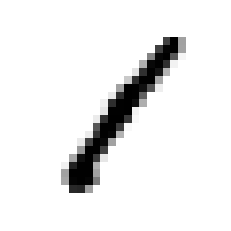

In [5]:
some_digit = np.array(train_data.loc[0])
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")   # remove the axis grid from the image
plt.show()

### Training a binary classifier

In [6]:
# Training a binary classifier
# lets simplify the problem and first try to classifiy only one digit
X_train = train_data.iloc[:30000]
Y_train_label = train_label[:30000]
X_test = train_data.iloc[30000:]
Y_test_label = train_label[30000:]

In [7]:
Y_train_5 = (Y_train_label==5)
Y_test_5 = (Y_test_label==5)

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([X_test.loc[30014]])

array([ True])

# Performance Measures

evaluating a classifier is tricker than evaluating a regressor so we will spend more time in checking the performance<br>
## Measuring accuracy using Cross Validation


In [11]:
# Implementation of Cross Validation Method
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state = 42)  # n_splits = 3 means split in 3 parts/folds

for train_index,test_index in skfolds.split(X_train,Y_train_5):
    
    #Clone does a deep copy of the model in an estimator without actually copying attached data.
    clone_clf = clone(sgd_clf) 
    
    # we are generating training data and testing data from the set of training data only this is what happens in k-foldCV
    # generating training data
    X_train_folds = X_train.iloc[train_index]
    Y_train_folds = Y_train_5.iloc[train_index]
    
    #generating testing data
    X_test_folds = X_train.iloc[test_index]
    Y_test_folds = Y_train_5.iloc[test_index]
    
    # fitting our model on k fold generated traing data and then test it on the kth fold
    clone_clf.fit(X_train_folds,Y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == Y_test_folds)
    print(n_correct/len(y_pred))  # gives the % of correct predections

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9662
0.9644
0.9624


In [12]:
# checking CV score from library fun
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,Y_train_5,cv=3,scoring="accuracy")

array([0.9662, 0.9644, 0.9624])

we cant realy on accuracy only it wont give us the performance measure
# Confusion Matrix

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [14]:
y_train_pred = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3)
confusion_matrix(y_train_pred,Y_train_5)

array([[26899,   688],
       [  382,  2031]], dtype=int64)

confusion matrix gives you a lot of information but sometimes you may prefer more concise metric/Precision is the accuracy of positive predictions<br>
$$precision = \frac{TP}{TP+FP}$$<br>
precision would typically use it with recall also called sensitivity or true positve/this is the ratio of positive instance that are correctly detected by the classifier
$$recall = \frac{TP}{TP+FN}$$<br>
# Precision and Recall

In [15]:
from sklearn.metrics import precision_score, recall_score

In [16]:
precision_score(Y_train_5,y_train_pred)

0.8416908412764194

In [17]:
recall_score(Y_train_5,y_train_pred)

0.7469657962486208

In [18]:
# we can combine both precision and recall into a single metric called F1 score
# the F1 score is the harmonic mean of precision and recall
from sklearn.metrics import f1_score
f1_score(Y_train_5,y_train_pred)

0.7915042868277474

# Precision Recall Curve

In [19]:
# scores or posterior probability for each instance
y_scores = cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3,method="decision_function")

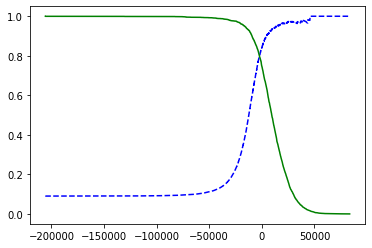

In [20]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(Y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    
    [...]  # highlight the threshold add the legend,axis label and grid
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

# The ROC Curve

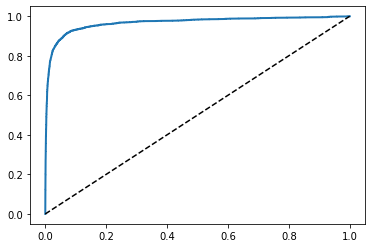

In [21]:
# Roc curve is the plot between recall and 1-specificity
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(Y_train_5,y_scores)

# then we need to plot the frp against tpr using matplt library

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")
    [...]
    
plot_roc_curve(fpr,tpr)
plt.show()
# dotted line means the area under the curve is 50% so the classifier is not good
# the blue line depicts a perfictly good classifier because in that case the true positive rate is high but not that high enough to cause overfitting to tha algorithm


In [22]:
# the roc_auc score gives the area under tha curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5,y_scores)

0.9665156086912556

Now lets compare the sgd classifier's ROC curve to random forests ROC curve

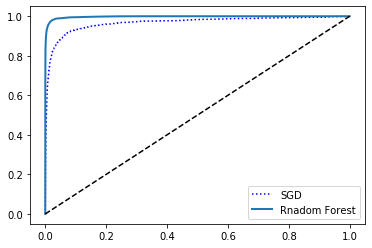

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_prob_forest = cross_val_predict(forest_clf,X_train,Y_train_5,cv=3,method="predict_proba")

# to plot ROC curve we need sores not probabilities so we will use positive class prob as the score

y_scores_forest = y_prob_forest[:,1]

fpr_forest , tpr_forest,thresholds_forest = roc_curve(Y_train_5,y_scores_forest)

# plotting the roc curve

plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Rnadom Forest")
plt.legend(loc="lower right")
plt.show()

In [24]:
# the Rnadom Forests ROC curve looks much better than the SGD's ROC Curve so its area under the curve will also be more
roc_auc_score(Y_train_5,y_scores_forest)

0.9977054961711266

# Multiclass Classification

some algorithm such as random forest.naive bayes classifier are capable of handling multiple classes directly.Others are strictly binary classifiers hoverever there are multiple staratigies that you cam use to perfrom multiclass classification using set of binary classifiers
1. first strategy is to train 10 binary classifiers each for one digit and then when you want to classify a digit compute the probability for each model and classify the digit based on the maximum probabilty among the models.this strategy is called One VS All or One VS Rest.<br>
2. another startegy is to train a binary classifier for every set of digit one to distinguish b/w 0 and 1 another to distinguish b/w 0 and 2 and so on if there are N classes then you need to train N * (N-1)/2 classifier. this is called One VS One strategy for MNIST digit classifier we beed 45 models(binary classifiers)
some algorithms such as SVM scale poorly with the size of training set so for these algorithm OvO is preffered since it is faster to train many classifier on small training set than training few classifiers on large training sets.

In [25]:
# Multiclass Classification using SGD Classifier
#  skip this step as we already created te object sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,Y_train_label)
sgd_clf.predict([some_digit])

array([1], dtype=int64)

In [26]:
# for multiclass classf SGD trained 10 binary and calculates scores for every class we can see the scores
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score
# the highest score is for 1 class and thats correct output

array([[-36393.90082603,  25294.0531357 ,  -6839.55678957,
        -12572.00067269, -65075.3940922 , -18764.84619784,
        -44572.14900147, -60734.48067716,  -5263.06527441,
        -43756.18441401]])

In [27]:
np.argmax(some_digit_score)

1

In [28]:
# if we want sciket learn to use One vs One strategy 
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,Y_train_label)
ovo_clf.predict([some_digit])
# some digit is actually 1 and the predictions is correct

array([1], dtype=int64)

In [29]:
forest_clf.fit(X_train,Y_train_label)
forest_clf.predict([some_digit])

array([1], dtype=int64)

In [30]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ]])

In [31]:
# lets evaluate sgd classifiers accuracy using cross validation
sgd_cv_scores = cross_val_score(sgd_clf,X_train,Y_train_label,cv=3,scoring="accuracy")
rand_forest_cv_scores = cross_val_score(forest_clf,X_train,Y_train_label,cv=3,scoring="accuracy")
print("SGD CV SCORES: ",sgd_cv_scores,sgd_cv_scores.mean())
print("RANDOM FOREST CV SCORES: ",rand_forest_cv_scores,rand_forest_cv_scores.mean())

SGD CV SCORES:  [0.87   0.8764 0.8515] 0.8659666666666667
RANDOM FOREST CV SCORES:  [0.9568 0.9574 0.9552] 0.9564666666666667


In [32]:
# lets standardize then we will see the difference
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train.astype(np.float64))

X_trained_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# lets evaluate sgd classifiers and random forests accuracy using cross validation when train data is standardise
sgd_cv_scores = cross_val_score(sgd_clf,X_trained_scaled,Y_train_label,cv=3,scoring="accuracy")

print("SGD CV SCORES: ",sgd_cv_scores,sgd_cv_scores.mean())


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD CV SCORES:  [0.9082 0.9089 0.9035] 0.9068666666666667


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [55]:
rand_forest_cv_scores = cross_val_score(forest_clf,X_trained_scaled,Y_train_label,cv=8,scoring="accuracy")

print("RANDOM FOREST CV SCORES: ",rand_forest_cv_scores,rand_forest_cv_scores.mean())

RANDOM FOREST CV SCORES:  [0.96053333 0.9624     0.9608     0.96026667 0.9616     0.95973333
 0.9584     0.95893333] 0.9603333333333334


performing standardscalar helps in improving accuracy in SGD Classifier but it doe not make any difference to the accuracy of Random Forest Classifier

# Error Analysis
After selecting the most promising model we will found ways to improve that model one way to do it is to analyse the errors it makes

In [43]:
y_train_pred = cross_val_predict(forest_clf,X_trained_scaled,Y_train_label,cv=3)
conf_mat = confusion_matrix(Y_train_label,y_train_pred)
conf_mat

array([[2888,    0,    4,    3,    4,    7,   13,    1,   15,    2],
       [   0, 3272,   22,    8,    6,    4,    6,    7,    5,    2],
       [   9,   12, 2892,   16,   22,    2,   14,   30,   17,    6],
       [   7,    3,   54, 2894,    4,   51,    5,   21,   34,   20],
       [   6,    4,    6,    1, 2818,    1,   17,    9,    7,   63],
       [  18,    8,    5,   54,    6, 2562,   30,    3,   19,   14],
       [  18,    4,    3,    0,    5,   21, 2906,    0,   13,    0],
       [   9,   16,   41,    5,   21,    0,    0, 2985,    7,   49],
       [   9,   13,   18,   45,   17,   21,   15,    4, 2701,   46],
       [  15,    8,    5,   46,   57,   10,    4,   26,   27, 2777]],
      dtype=int64)

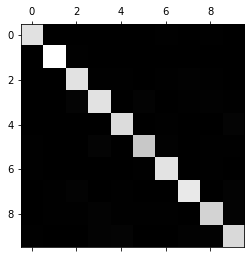

In [44]:
plt.matshow(conf_mat,cmap=plt.cm.gray)
plt.show()
# some of the diagnols blocks are slightly darker it means the classifier does not perfrom well on classifying those

In [45]:
rows_sums = conf_mat.sum(axis=1,keepdims=True)
norm_conf_mat = conf_mat/rows_sums
norm_conf_mat

array([[9.83316309e-01, 0.00000000e+00, 1.36193395e-03, 1.02145046e-03,
        1.36193395e-03, 2.38338441e-03, 4.42628533e-03, 3.40483487e-04,
        5.10725230e-03, 6.80966973e-04],
       [0.00000000e+00, 9.81992797e-01, 6.60264106e-03, 2.40096038e-03,
        1.80072029e-03, 1.20048019e-03, 1.80072029e-03, 2.10084034e-03,
        1.50060024e-03, 6.00240096e-04],
       [2.98013245e-03, 3.97350993e-03, 9.57615894e-01, 5.29801325e-03,
        7.28476821e-03, 6.62251656e-04, 4.63576159e-03, 9.93377483e-03,
        5.62913907e-03, 1.98675497e-03],
       [2.26317491e-03, 9.69932105e-04, 1.74587779e-02, 9.35661170e-01,
        1.29324281e-03, 1.64888458e-02, 1.61655351e-03, 6.78952473e-03,
        1.09925639e-02, 6.46621403e-03],
       [2.04638472e-03, 1.36425648e-03, 2.04638472e-03, 3.41064120e-04,
        9.61118690e-01, 3.41064120e-04, 5.79809004e-03, 3.06957708e-03,
        2.38744884e-03, 2.14870396e-02],
       [6.62008091e-03, 2.94225818e-03, 1.83891136e-03, 1.98602427e-02,
   

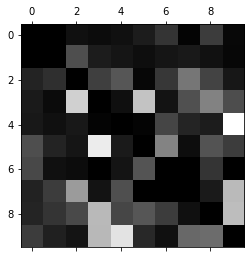

In [46]:
np.fill_diagonal(norm_conf_mat,0)
plt.matshow(norm_conf_mat,cmap=plt.cm.gray)
plt.show()
# the row represents actual classes and the col represents predicted classes
# w ecan see 3 is missclassified as 2 similary 5 is missclassified as 3 ,9 as 4 and so on
# looking at the plot it seems that our effort should be more on reducing fasle 5,9 etc

# Multilabel Classification

In [47]:
# a classification which outputs multiple binary tags is called multilabel classification eg [1,0,0] for a label
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (Y_train_label>=7)
y_train_odd = (Y_train_label%2==1)

# this contains two target label for each eg/image
y_multilabel = np.c_[y_train_large,y_train_odd] 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [50]:
knn_clf.predict([some_digit])   

array([[False,  True]])